In [2]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargar el dataset
data = pd.read_csv('/content/parkinsons.data')  # Asegúrate de subir el archivo a Colab

# 3. Vista general del dataset
print("Forma del dataset:", data.shape)
print("\nColumnas:", data.columns.tolist())

# 4. Primeras filas
data.head()


Forma del dataset: (195, 24)

Columnas: ['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# Bloque 1: Tipos y valores nulos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Mostrar info de columnas y nulos
data.info()

# 2. Eliminar columna 'name' (no aporta al modelo)
data = data.drop(columns='name')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

/tmp/ipython-input-4-4075246434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=data, palette='Set2')


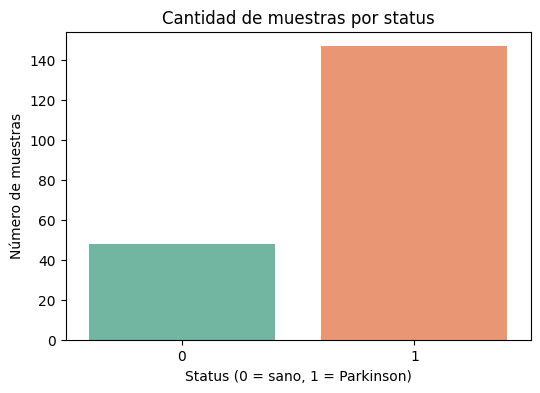

In [4]:
# Bloque 2: Distribución de 'status'
plt.figure(figsize=(6,4))
sns.countplot(x='status', data=data, palette='Set2')
plt.title('Cantidad de muestras por status')
plt.xlabel('Status (0 = sano, 1 = Parkinson)')
plt.ylabel('Número de muestras')
plt.show()


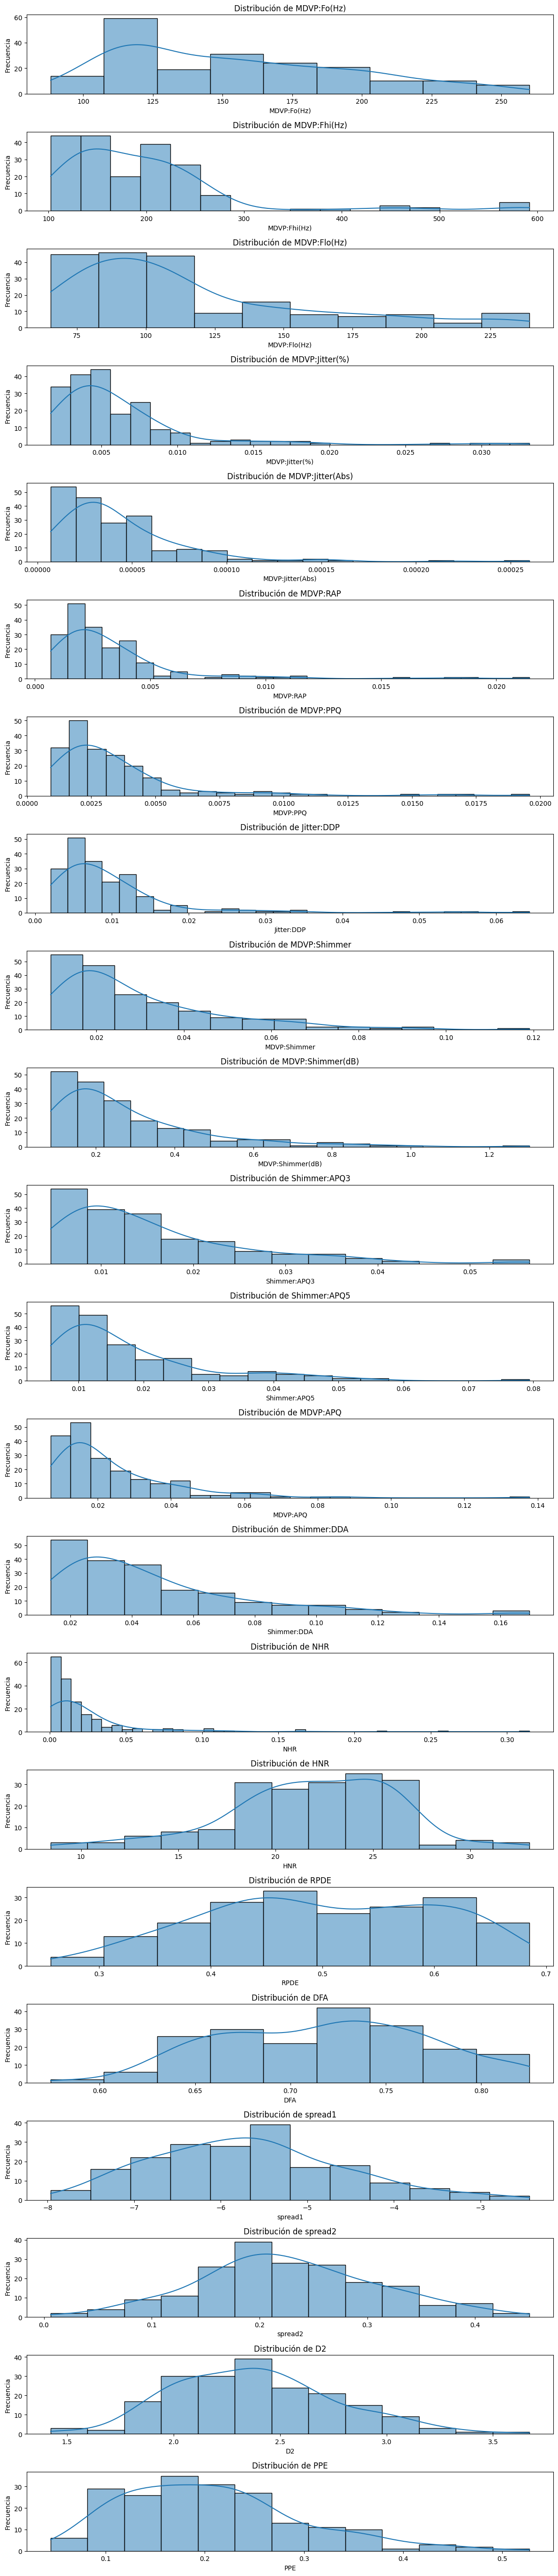

In [5]:
# Bloque 3: Histogramas y KDE para variables numéricas
num_cols = data.select_dtypes(include='number').columns.drop('status')
plt.figure(figsize=(12, 2.5 * len(num_cols)))

for i, col in enumerate(num_cols, 1):
    ax = plt.subplot(len(num_cols), 1, i)
    sns.histplot(data[col], kde=True)
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Distribución de {col}')

plt.tight_layout()
plt.show()


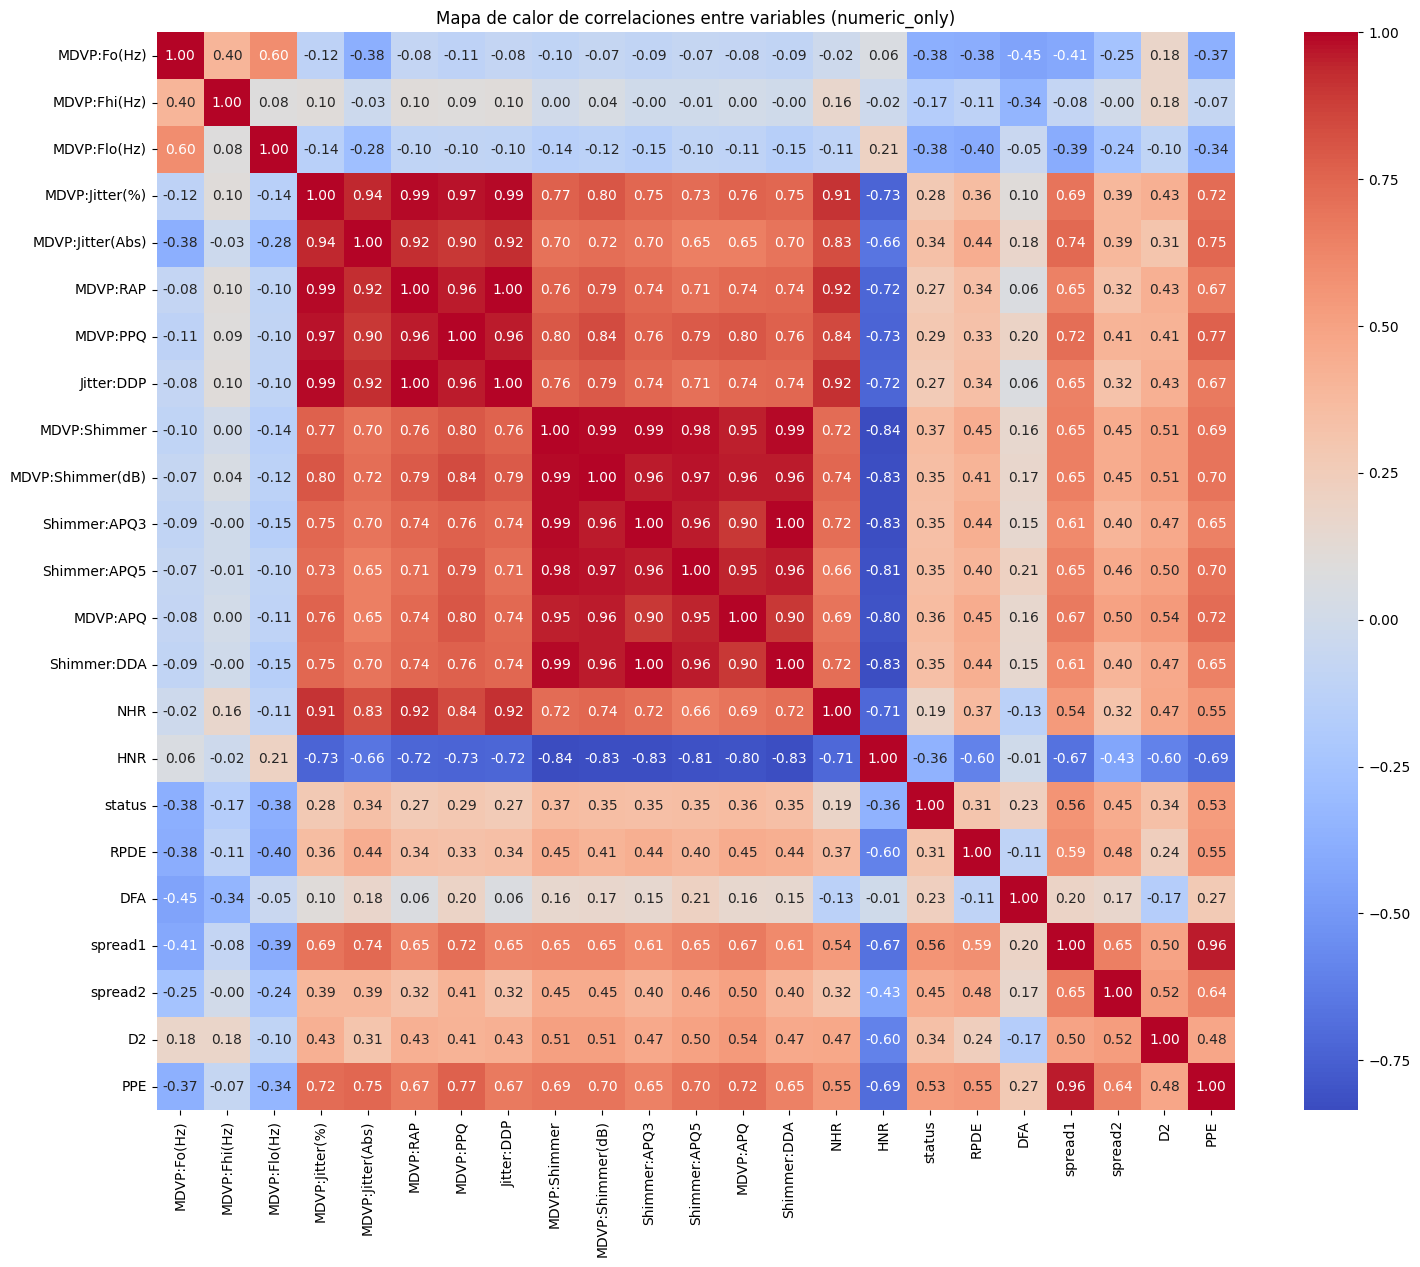

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# mapa correlacion entre variables
plt.figure(figsize=(18,14))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Mapa de calor de correlaciones entre variables (numeric_only)")
plt.show()


In [7]:
import pandas as pd
from IPython.display import display


# Seleccionar solo columnas numéricas
numeric_cols = data.select_dtypes(include='number').columns.tolist()

# 1) Correlación de todas las variables con 'status'
corrs_all = data[numeric_cols].corr()[['status']].drop(index=['status'])
corrs_all = corrs_all.rename(columns={'status': 'Correlation_with_status'})
corrs_all = corrs_all.sort_values(by='Correlation_with_status', key=lambda x: x.abs(), ascending=False)
corrs_all = corrs_all.reset_index().rename(columns={'index':'Feature'})

# 2) Rangos (min, max) de todas las variables
ranges_all = data[numeric_cols].agg(['min','max']).T.reset_index().rename(columns={'index':'Feature'})

# 3) Descripción por grupo para todas las variables
desc_by_status_all = data.groupby('status')[numeric_cols].describe().stack(level=0)
desc_by_status_all = desc_by_status_all.reset_index().rename(columns={'level_1':'Statistic'})

# Mostrar resultados
display(corrs_all)
display(ranges_all)
display(desc_by_status_all)

/tmp/ipython-input-7-4098033341.py:18: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  desc_by_status_all = data.groupby('status')[numeric_cols].describe().stack(level=0)


,Feature,Correlation_with_status
0,spread1,0.564838
1,PPE,0.531039
2,spread2,0.454842
3,MDVP:Fo(Hz),-0.383535
4,MDVP:Flo(Hz),-0.380200
5,MDVP:Shimmer,0.367430
6,MDVP:APQ,0.364316
7,HNR,-0.361515
8,Shimmer:APQ5,0.351148
9,MDVP:Shimmer(dB),0.350697


,Feature,min,max
0,MDVP:Fo(Hz),88.333000,260.105000
1,MDVP:Fhi(Hz),102.145000,592.030000
2,MDVP:Flo(Hz),65.476000,239.170000
3,MDVP:Jitter(%),0.001680,0.033160
4,MDVP:Jitter(Abs),0.000007,0.000260
5,MDVP:RAP,0.000680,0.021440
6,MDVP:PPQ,0.000920,0.019580
7,Jitter:DDP,0.002040,0.064330
8,MDVP:Shimmer,0.009540,0.119080
9,MDVP:Shimmer(dB),0.085000,1.302000


,status,Statistic,count,mean,std,min,25%,50%,75%,max
0,0,D2,48.0,2.154491,0.310269,1.423287,1.974217,2.129510,2.339487,2.882450
1,0,DFA,48.0,0.695716,0.051346,0.626710,0.654291,0.682527,0.742284,0.785714
2,0,HNR,48.0,24.678750,3.434540,17.883000,22.993250,24.997000,26.139250,33.047000
3,0,Jitter:DDP,48.0,0.005776,0.003199,0.002760,0.003998,0.004875,0.005725,0.018730
4,0,MDVP:APQ,48.0,0.013305,0.003825,0.007190,0.011235,0.013015,0.015945,0.027450
5,0,MDVP:Fhi(Hz),48.0,223.636750,96.727067,113.597000,139.413250,231.161500,251.239250,592.030000
6,0,MDVP:Flo(Hz),48.0,145.207292,58.757070,74.287000,98.243750,113.938500,199.183000,239.170000
7,0,MDVP:Fo(Hz),48.0,181.937771,52.731067,110.739000,120.947500,198.996000,229.077000,260.105000
8,0,MDVP:Jitter(%),48.0,0.003866,0.002055,0.001780,0.002655,0.003355,0.004530,0.013600
9,0,MDVP:Jitter(Abs),48.0,0.000023,0.000015,0.000007,0.000010,0.000025,0.000030,0.000080


In [7]:
import pandas as pd
from scipy.stats import shapiro, levene, kruskal

# 1) Prepara la lista de features a testear (todas excepto 'status')
features = [c for c in data.columns if c != 'status']

# 2) Itera sobre cada feature y almacena los p-values de Shapiro–Wilk
results = []
for feat in features:
    X0 = data.loc[data['status'] == 0, feat]
    X1 = data.loc[data['status'] == 1, feat]

    stat0, p0 = shapiro(X0)
    stat1, p1 = shapiro(X1)

    results.append({
        'feature':      feat,
        'shapiro0_p':   p0,
        'shapiro1_p':   p1,
    })

# 3) DataFrame inicial
df_tests = pd.DataFrame(results)

# 4) Función para formatear p-values
def fmt_pval(p):
    return "<0.001" if p < 0.001 else f"{p:.3f}"

# 5) Aplica el formateo
df_tests['shapiro0_p_fmt'] = df_tests['shapiro0_p'].apply(fmt_pval)
df_tests['shapiro1_p_fmt'] = df_tests['shapiro1_p'].apply(fmt_pval)

# 6) Añade columna de interpretación
df_tests['norm0'] = df_tests['shapiro0_p'].apply(lambda p: 'Normal' if p >= 0.05 else 'No normal')
df_tests['norm1'] = df_tests['shapiro1_p'].apply(lambda p: 'Normal' if p >= 0.05 else 'No normal')

# 7) Elige columnas para presentar
df_present = df_tests[[
    'feature',
    'shapiro0_p_fmt', 'norm0',
    'shapiro1_p_fmt', 'norm1'
]]

# 8) Muestra el resultado
from IPython.display import display
display(df_present)


,feature,shapiro0_p_fmt,norm0,shapiro1_p_fmt,norm1
0,MDVP:Fo(Hz),<0.001,No normal,<0.001,No normal
1,MDVP:Fhi(Hz),<0.001,No normal,<0.001,No normal
2,MDVP:Flo(Hz),<0.001,No normal,<0.001,No normal
3,MDVP:Jitter(%),<0.001,No normal,<0.001,No normal
4,MDVP:Jitter(Abs),<0.001,No normal,<0.001,No normal
5,MDVP:RAP,<0.001,No normal,<0.001,No normal
6,MDVP:PPQ,<0.001,No normal,<0.001,No normal
7,Jitter:DDP,<0.001,No normal,<0.001,No normal
8,MDVP:Shimmer,<0.001,No normal,<0.001,No normal
9,MDVP:Shimmer(dB),<0.001,No normal,<0.001,No normal


In [14]:
import pandas as pd
from scipy.stats import shapiro, levene, kruskal
from sklearn.feature_selection import f_classif
from IPython.display import display

# 1) Features a testear
features = [c for c in data.columns if c != 'status']
results = []

for feat in features:
    X0 = data.loc[data['status']==0, feat]
    X1 = data.loc[data['status']==1, feat]

    # 2) Supuestos
    p0     = shapiro(X0).pvalue
    p1     = shapiro(X1).pvalue
    p_leve = levene(X0, X1).pvalue
    is_param = (p0 >= 0.05 and p1 >= 0.05 and p_leve >= 0.05)

    if is_param:
        # ANOVA–F
        F_vals, p_anovas = f_classif(data[[feat]], data['status'])
        stat, p_val = F_vals[0], p_anovas[0]
        test_name = "ANOVA–F"
    else:
        # Kruskal–Wallis
        stat, p_val = kruskal(X0, X1)
        test_name = "Kruskal–Wallis"

    results.append({
        'feature':   feat,
        'test':      test_name,
        'statistic': stat,
        'p_value':   p_val
    })

# 3) DataFrame y ranking
df_res = pd.DataFrame(results)

# Separamos y ordenamos
param_df    = df_res[df_res['test']=="ANOVA–F"].sort_values('statistic', ascending=False)
nonparam_df = df_res[df_res['test']=="Kruskal–Wallis"].sort_values('p_value', ascending=True)

df_rank = pd.concat([param_df, nonparam_df], ignore_index=True)
df_rank['rank'] = df_rank.index + 1

# 4) Formateo de columnas para presentar
def fmt_stat(x):    return f"{x:.2f}"
def fmt_pval(x):   return "<0.001" if x<0.001 else f"{x:.3f}"

df_rank['statistic_fmt'] = df_rank['statistic'].apply(fmt_stat)
df_rank['p_value_fmt']   = df_rank['p_value'].apply(fmt_pval)

# 5) Mostrar tabla clara
display(df_rank[[
    'rank',
    'feature',
    'test',
    'statistic_fmt',
    'p_value_fmt'
]].rename(columns={
    'test': 'prueba',
    'statistic_fmt': 'estadístico',
    'p_value_fmt':   'p-valor'
}))


# 6) Seleccionar las top-8 variables
k = 8
top_k = df_rank['feature'].head(k).tolist()

print(f"▶ Top-{k} variables seleccionadas:")
for i, feat in enumerate(top_k, start=1):
    print(f"{i}. {feat}")


,rank,feature,prueba,estadístico,p-valor
0,1,spread2,ANOVA–F,50.34,<0.001
1,2,PPE,Kruskal–Wallis,68.08,<0.001
2,3,spread1,Kruskal–Wallis,68.08,<0.001
3,4,MDVP:APQ,Kruskal–Wallis,45.88,<0.001
4,5,MDVP:Jitter(Abs),Kruskal–Wallis,36.87,<0.001
5,6,MDVP:PPQ,Kruskal–Wallis,35.63,<0.001
6,7,MDVP:Shimmer(dB),Kruskal–Wallis,35.11,<0.001
7,8,MDVP:Shimmer,Kruskal–Wallis,34.53,<0.001
8,9,MDVP:Jitter(%),Kruskal–Wallis,33.32,<0.001
9,10,Jitter:DDP,Kruskal–Wallis,33.25,<0.001


▶ Top-8 variables seleccionadas:
1. spread2
2. PPE
3. spread1
4. MDVP:APQ
5. MDVP:Jitter(Abs)
6. MDVP:PPQ
7. MDVP:Shimmer(dB)
8. MDVP:Shimmer


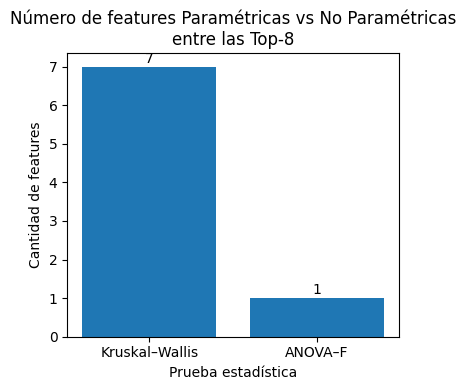

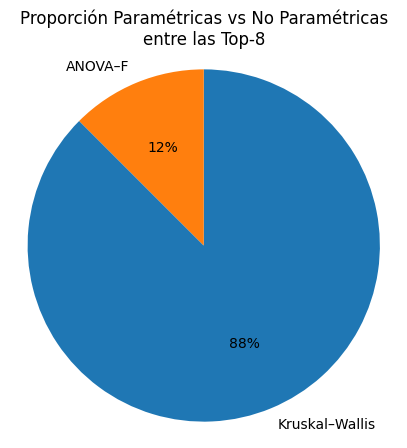

In [17]:
import matplotlib.pyplot as plt

# 1) Filtrar las top-8
top_k = df_rank.head(8).copy()

# 2) Conteo de pruebas aplicadas
counts = top_k['test'].value_counts()

# ——— Bar plot con matplotlib ———
plt.figure(figsize=(4,4))
plt.bar(counts.index, counts.values)            # barras con default colors
plt.title('Número de features Paramétricas vs No Paramétricas\nentre las Top-8')
plt.xlabel('Prueba estadística')
plt.ylabel('Cantidad de features')
for i, v in enumerate(counts.values):
    plt.text(i, v + 0.1, str(v), ha='center')
plt.tight_layout()
plt.show()

# ——— Pie chart con matplotlib ———
plt.figure(figsize=(5,5))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.0f%%',
    startangle=90,
    counterclock=False
)
plt.title('Proporción Paramétricas vs No Paramétricas\nentre las Top-8')
plt.axis('equal')
plt.show()



In [19]:
# Tu lista de las top-8 features
top8 = [
    'spread2', 'PPE', 'spread1', 'MDVP:APQ',
    'MDVP:Jitter(Abs)', 'MDVP:PPQ',
    'MDVP:Shimmer(dB)', 'MDVP:Shimmer'
]
# Construye X_sel y y desde data
X_sel = data[top8]
y     = data['status']



/tmp/ipython-input-22-3939633669.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  summary_flat = summary.stack(level=0).unstack(level=1)


,status,spread2_statusmean,spread2_statusmedian,spread2_statusstd,PPE_statusmean,PPE_statusmedian,PPE_statusstd,spread1_statusmean,spread1_statusmedian,spread1_statusstd,...,MDVP:Jitter(Abs)_statusstd,MDVP:PPQ_statusmean,MDVP:PPQ_statusmedian,MDVP:PPQ_statusstd,MDVP:Shimmer(dB)_statusmean,MDVP:Shimmer(dB)_statusmedian,MDVP:Shimmer(dB)_statusstd,MDVP:Shimmer_statusmean,MDVP:Shimmer_statusmedian,MDVP:Shimmer_statusstd
0,0,0.013305,0.000023,0.002056,0.017615,0.162958,0.123017,-6.759264,0.160292,0.013015,...,-6.826448,0.167356,0.003825,0.000015,0.000943,0.005544,0.057822,0.044820,0.642782,0.062982
1,1,0.027600,0.000051,0.003900,0.033658,0.321204,0.233828,-5.333420,0.248133,0.021570,...,-5.440040,0.240875,0.018062,0.000037,0.002998,0.019970,0.207798,0.084271,0.970792,0.077809


/tmp/ipython-input-22-3939633669.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=feat, data=data, ax=ax, palette='Set2')
/tmp/ipython-input-22-3939633669.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=feat, data=data, ax=ax, palette='Set2')
/tmp/ipython-input-22-3939633669.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=feat, data=data, ax=ax, palette='Set2')
/tmp/ipython-input-22-3939633669.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

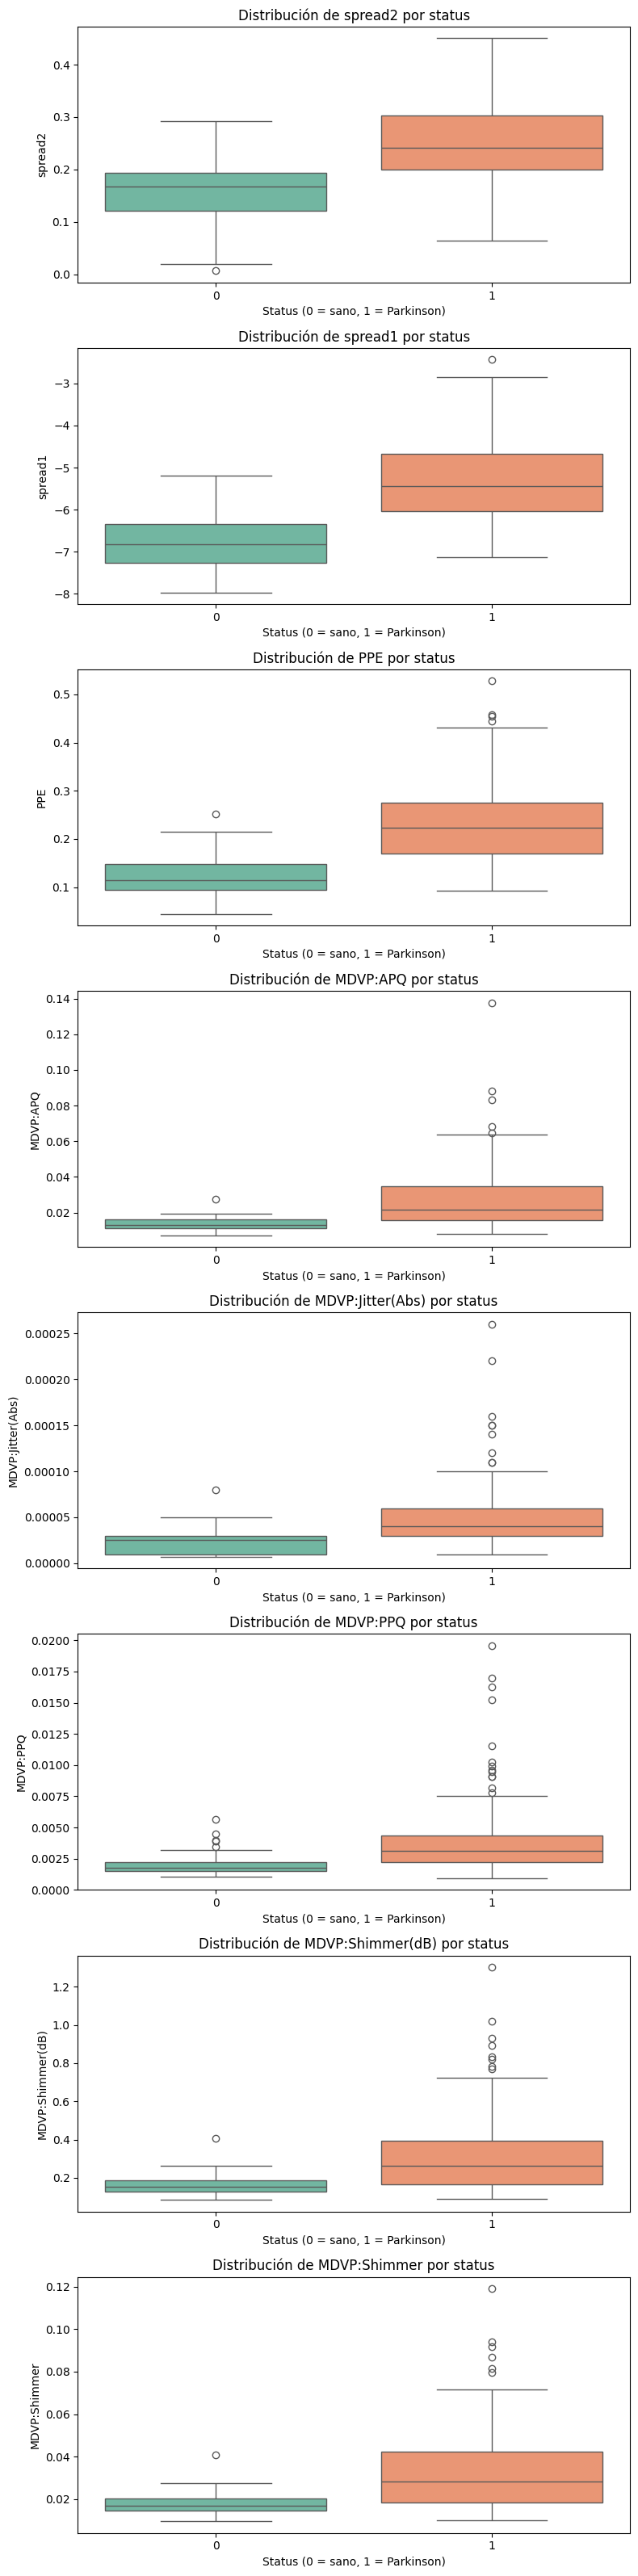

In [22]:
# 2) Agrupar por status y calcular media, mediana y desviación estándar
summary = (
    data[top8 + ['status']]
      .groupby('status')
      .agg(['mean','median','std'])
)

# 3) Reformatear para tener una fila por feature y columnas multi‐índice
#    (opcional) aplanamos los índices para mayor legibilidad
summary_flat = summary.stack(level=0).unstack(level=1)
summary_flat.columns = [f"{stat}_status{grp}"
                        for stat, grp in summary.columns]
summary_flat = summary_flat.reset_index().rename(columns={'level_0':'Feature'})

# 4) Mostrar la tabla
display(summary_flat)

# 2) Boxplots de las top-8 features por status
top8 = df_rank['feature'].head(8).tolist()

fig, axes = plt.subplots(len(top8), 1, figsize=(8, 4 * len(top8)))
for ax, feat in zip(axes, top8):
    sns.boxplot(x='status', y=feat, data=data, ax=ax, palette='Set2')
    ax.set_title(f'Distribución de {feat} por status')
    ax.set_xlabel('Status (0 = sano, 1 = Parkinson)')
    ax.set_ylabel(feat)
plt.tight_layout()
plt.show()

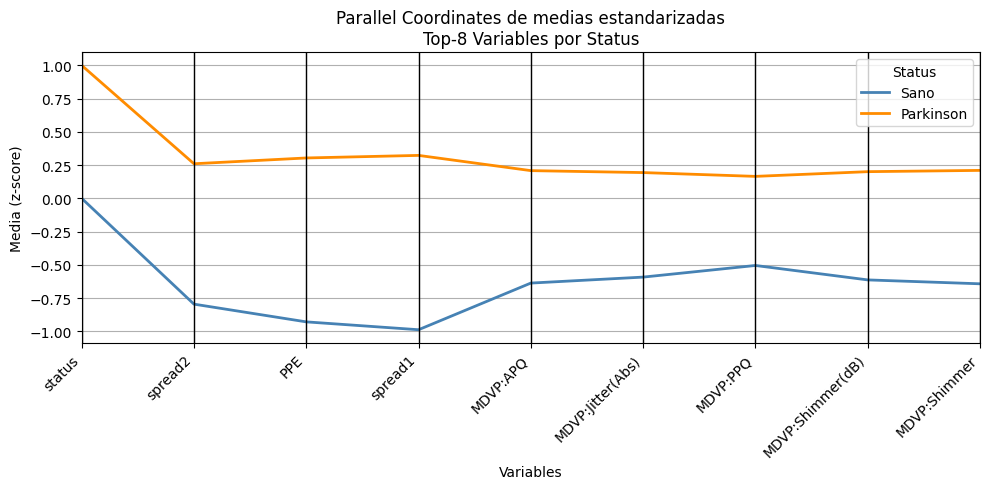

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler

# 1) Selecciona las top-8
top8 = df_rank['feature'].head(8).tolist()

# 2) Estandariza las variables (para que todas estén en la misma escala)
X = data[top8]
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=top8)

# 3) Calcula las medias por grupo
means_scaled = (
    X_scaled
      .assign(status=data['status'])
      .groupby('status')
      .mean()
      .reset_index()
)

# 4) Parallel coordinates
plt.figure(figsize=(10, 5))
parallel_coordinates(
    means_scaled,
    class_column='status',
    cols=['status'] + top8,
    color=['steelblue','darkorange'],
    linewidth=2
)
plt.title('Parallel Coordinates de medias estandarizadas\nTop-8 Variables por Status')
plt.xlabel('Variables')
plt.ylabel('Media (z-score)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status', labels=['Sano','Parkinson'])
plt.tight_layout()
plt.show()


In [24]:
#  Split train/test (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_sel, y, test_size=0.2, stratify=y, random_state=42
)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, matthews_corrcoef

# 1) Definir CV común
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2) Definir métricas
scoring = {
    'accuracy':  'accuracy',
    'precision': 'precision',
    'recall':    'recall',
    'f1':        'f1',
    'mcc':       make_scorer(matthews_corrcoef)
}

# 3) Configurar modelos
models = {
    'Logistic L2':   LogisticRegression(penalty='l2', solver='saga',
                                        max_iter=5000, random_state=42),
    'SVM (RBF)':     SVC(kernel='rbf', probability=True, random_state=42),
    'k-NN':          KNeighborsClassifier(n_neighbors=5),
    'Naïve Bayes':   GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost':       XGBClassifier(eval_metric='logloss', random_state=42)
}


# BLOQUE 3: Evaluación CV y captura de tiempos
import pandas as pd
results = []
for name, model in models.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', model)])
    cv_res = cross_validate(
        pipe, X_train, y_train,
        cv=cv, scoring=scoring,
        return_train_score=False, n_jobs=-1
    )
    results.append({
        'Model':     name,
        'TrainTime': cv_res['fit_time'].mean(),
        'Accuracy':  cv_res['test_accuracy'].mean(),
        'Precision': cv_res['test_precision'].mean(),
        'Recall':    cv_res['test_recall'].mean(),
        'F1':        cv_res['test_f1'].mean(),
        'MCC':       cv_res['test_mcc'].mean()
    })

df_results = pd.DataFrame(results).sort_values('MCC', ascending=False).reset_index(drop=True)
print("\n### Resultados CV con tiempos ###\n")
df_results = df_results.round(2)
display(df_results)

import platform

# 3.0) Obtener specs del equipo
try:
    import psutil
    total_ram = f"{psutil.virtual_memory().total / (1024**3):.2f} GB"
except ImportError:
    total_ram = "psutil no instalado"

system_info = {
    'OS':       f"{platform.system()} {platform.release()}",
    'CPU':      platform.processor(),
    'RAM':      total_ram
}

df_sys = (
    pd.DataFrame.from_dict(system_info, orient='index', columns=['Especificación'])
      .reset_index()
      .rename(columns={'index':'Recurso'})
)
display(df_sys)


### Resultados CV con tiempos ###



,Model,TrainTime,Accuracy,Precision,Recall,F1,MCC
0,Random Forest,0.58,0.85,0.89,0.92,0.90,0.59
1,Naïve Bayes,0.01,0.76,0.97,0.71,0.82,0.54
2,XGBoost,0.12,0.83,0.89,0.88,0.88,0.54
3,k-NN,0.01,0.81,0.87,0.88,0.87,0.47
4,SVM (RBF),0.01,0.82,0.85,0.93,0.89,0.46
5,Logistic L2,0.02,0.81,0.85,0.91,0.88,0.44


,Recurso,Especificación
0,OS,Linux 6.1.123+
1,CPU,x86_64
2,RAM,12.67 GB


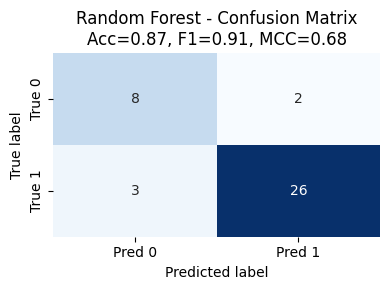

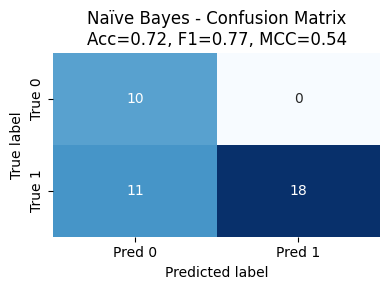

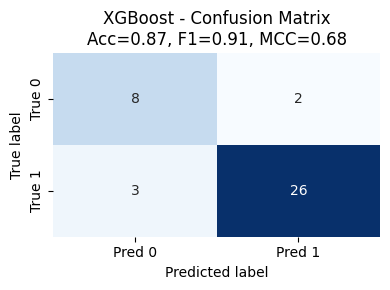

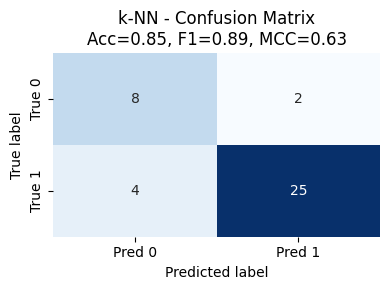

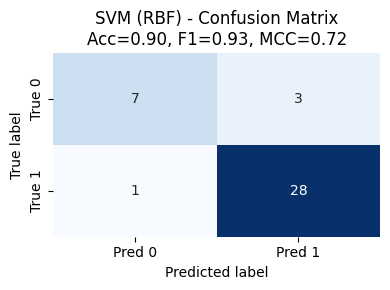

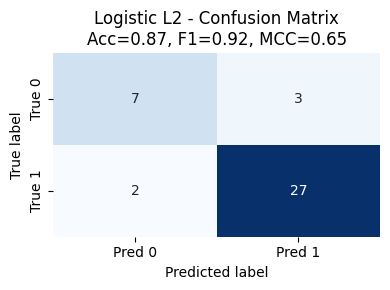

,Model,Filename,Accuracy,Precision,Recall,F1,MCC
0,SVM (RBF),SVM_(RBF).h,0.90,0.90,0.97,0.93,0.72
1,Random Forest,Random_Forest.h,0.87,0.93,0.90,0.91,0.68
2,XGBoost,XGBoost.h,0.87,0.93,0.90,0.91,0.68
3,Logistic L2,Logistic_L2.h,0.87,0.90,0.93,0.92,0.65
4,k-NN,k-NN.h,0.85,0.93,0.86,0.89,0.63
5,Naïve Bayes,Naïve_Bayes.h,0.72,1.00,0.62,0.77,0.54


In [30]:
# BLOQUE 4: Guardado de pipelines y evaluación en test (con heatmaps)
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

test_results = []
for row in df_results.itertuples(index=False):
    name = row.Model

    # 4.1) Entrenar y guardar pipeline
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', models[name])])
    pipe.fit(X_train, y_train)
    filename = f"{name.replace(' ', '_')}.h"
    joblib.dump(pipe, filename)

    # 4.2) Evaluar en test
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    mcc  = matthews_corrcoef(y_test, y_pred)

    test_results.append({
        'Model':    name,
        'Filename': filename,
        'Accuracy': acc,
        'Precision':prec,
        'Recall':   rec,
        'F1':       f1,
        'MCC':      mcc,
        'ConfMat':  cm
    })

    # 4.3) Mostrar matriz de confusión como heatmap
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
    plt.title(f'{name} - Confusion Matrix\nAcc={acc:.2f}, F1={f1:.2f}, MCC={mcc:.2f}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

# 4.4) Crear DataFrame con las métricas
import pandas as pd
df_test = pd.DataFrame(test_results).sort_values('MCC', ascending=False).reset_index(drop=True)

# 1) Redondea todas las columnas numéricas a 2 decimales
df_test[['Accuracy','Precision','Recall','F1','MCC']] = df_test[[
    'Accuracy','Precision','Recall','F1','MCC'
]].round(2)

# 2) Muestra la tabla (sin la columna ConfMat, que ya has visualizado con los heatmaps)
display(df_test.drop(columns='ConfMat'))


,Model,MCC
0,SVM (RBF),0.72
1,Random Forest,0.68
2,XGBoost,0.68
3,Logistic L2,0.65
4,k-NN,0.63
5,Naïve Bayes,0.54


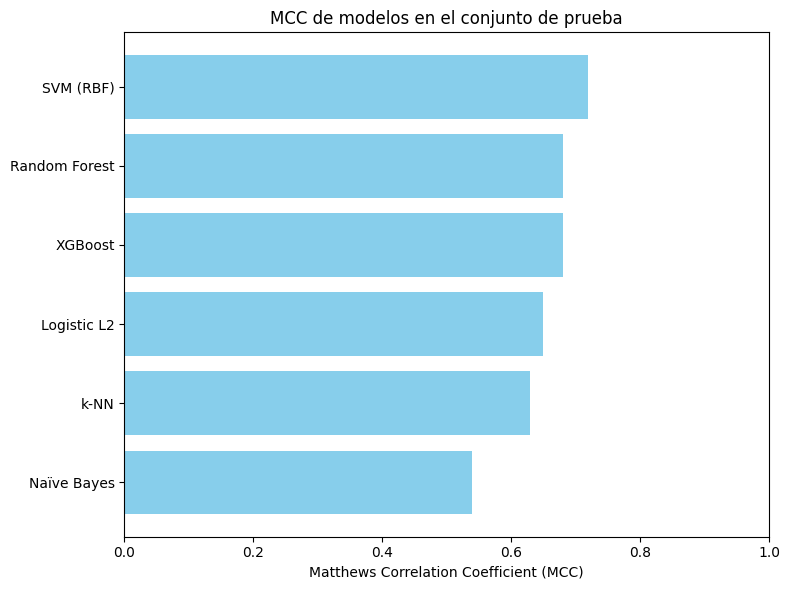

In [34]:

# 1) Redondear MCC a 2 decimales
df_test['MCC'] = df_test['MCC'].round(2)

# 2) Crear un DataFrame con modelo y MCC, ordenado de mayor a menor
df_mcc = df_test[['Model', 'MCC']].sort_values('MCC', ascending=False).reset_index(drop=True)

# 3) Mostrar la tabla de MCC
display(df_mcc)

# 4) Gráfico de barras horizontal de MCC
plt.figure(figsize=(8, 6))
plt.barh(df_mcc['Model'], df_mcc['MCC'], color='skyblue')
plt.xlabel('Matthews Correlation Coefficient (MCC)')
plt.title('MCC de modelos en el conjunto de prueba')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invierte el eje Y para que el mejor modelo aparezca arriba
plt.tight_layout()
plt.show()

In [31]:
# —————————————————————————————
# BLOQUE 5: Selección del mejor modelo y pruebas
# —————————————————————————————

import joblib
from statsmodels.stats.contingency_tables import mcnemar

# 5.1) Escoger según Test
best = df_test.loc[0]
best_model = best['Model']
best_file  = best['Filename']
best_mcc   = best['MCC']
print(f"▶ Mejor modelo (Test): {best_model} (MCC={best_mcc:.3f}), archivo = {best_file}\n")

# 5.2) Prueba funcional (inferencia de ejemplo)
pipe_best = joblib.load(best_file)
sample   = X_test.iloc[0:1]
true     = y_test.iloc[0]
pred     = pipe_best.predict(sample)[0]
prob     = pipe_best.predict_proba(sample)[0,1]
print(f"Funcional test → True: {true}, Pred: {pred}, Probabilidad(+): {prob:.3f}\n")

# 5.3) McNemar Test (mejor vs. otros en Test)
print("▶ McNemar Test (mejor vs. otros):")
y_best = pipe_best.predict(X_test)
for other in df_test['Model'][1:]:
    other_pipe = joblib.load(f"{other.replace(' ', '_')}.h")
    y_other    = other_pipe.predict(X_test)
    table      = pd.crosstab(y_best, y_other)
    mcn        = mcnemar(table, exact=True)
    sig = "sí" if mcn.pvalue < 0.05 else "no"
    print(f"{best_model} vs {other}: p-value = {mcn.pvalue:.3f} → diferencia significativa: {sig}")


▶ Mejor modelo (Test): SVM (RBF) (MCC=0.720), archivo = SVM_(RBF).h

Funcional test → True: 0, Pred: 1, Probabilidad(+): 0.887

▶ McNemar Test (mejor vs. otros):
SVM (RBF) vs Random Forest: p-value = 0.250 → diferencia significativa: no
SVM (RBF) vs XGBoost: p-value = 0.375 → diferencia significativa: no
SVM (RBF) vs Logistic L2: p-value = 1.000 → diferencia significativa: no
SVM (RBF) vs k-NN: p-value = 0.219 → diferencia significativa: no
SVM (RBF) vs Naïve Bayes: p-value = 0.000 → diferencia significativa: sí


ANALISIS FINAL DE LOS HIPER PARAMETROS

In [36]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# 2) Seleccionar las 8 features iniciales
top8 = [
    'spread2','PPE','spread1','MDVP:APQ',
    'MDVP:Jitter(Abs)','MDVP:PPQ',
    'MDVP:Shimmer(dB)','MDVP:Shimmer'
]
X = data[top8]
y = data['status']


In [37]:
from sklearn.model_selection import GridSearchCV

# 1) Define tu pipeline base y parámetros
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    SVC(probability=True, random_state=42))
])
param_grid = {
    'clf__kernel': ['linear','rbf'],
    'clf__C':      [0.1,1,10,100],
    'clf__gamma':  ['scale','auto',0.01,0.1,1]
}

# 2) Métricas a optimizar
metrics = {
    'AUC-ROC':  'roc_auc',
    'Accuracy': 'accuracy',
    'Precision':'precision',
    'Recall':   'recall',
    'F1':       'f1',
    'MCC':      make_scorer(matthews_corrcoef)
}

best_hyper = {}

for name, scoring in metrics.items():
    # 3) GridSearchCV para ESTA métrica
    grid = GridSearchCV(
        pipe, param_grid,
        cv=cv, scoring=scoring, n_jobs=-1
    )
    grid.fit(X_train, y_train)

    # 4) Guarda el mejor combo
    best_hyper[name] = {
        'params': grid.best_params_,
        'CV_score': grid.best_score_
    }

# 5) Mostrar resultados
import pandas as pd
df_hyper = pd.DataFrame.from_dict(best_hyper, orient='index')
display(df_hyper)


,params,CV_score
AUC-ROC,"{'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__k...",0.901203
Accuracy,"{'clf__C': 100, 'clf__gamma': 1, 'clf__kernel'...",0.839919
Precision,"{'clf__C': 100, 'clf__gamma': 1, 'clf__kernel'...",0.884962
Recall,"{'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__k...",1.000000
F1,"{'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': ...",0.896057
MCC,"{'clf__C': 100, 'clf__gamma': 1, 'clf__kernel'...",0.560434


Fitting 5 folds for each of 40 candidates, totalling 200 fits
► Mejores hiperparámetros (MCC): {'clf__C': 100, 'clf__gamma': 1, 'clf__kernel': 'rbf'}
► Mejor MCC en CV: 0.560



,Métrica,#Features,CV_Score,Test_Score,Features
0,AUC-ROC,3,0.912,0.921,"spread1, MDVP:APQ, MDVP:Shimmer"
1,Accuracy,2,0.847,0.846,"MDVP:APQ, MDVP:Shimmer"
2,Precision,2,0.876,0.897,"MDVP:APQ, MDVP:Shimmer"
3,Recall,2,0.933,0.897,"MDVP:APQ, MDVP:Shimmer"
4,F1,2,0.902,0.897,"MDVP:APQ, MDVP:Shimmer"
5,MCC,2,0.573,0.597,"MDVP:APQ, MDVP:Shimmer"


/tmp/ipython-input-42-1581359089.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='#Features', y='Métrica', data=df_comp, palette='mako')


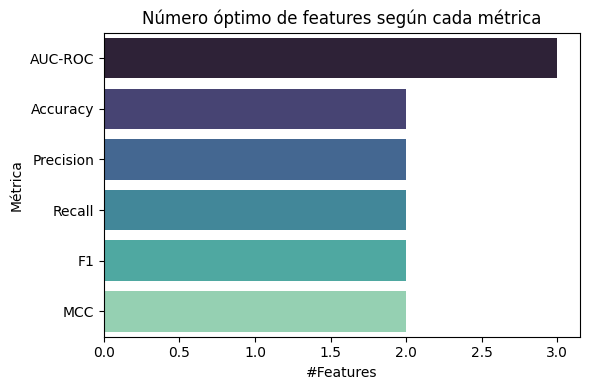

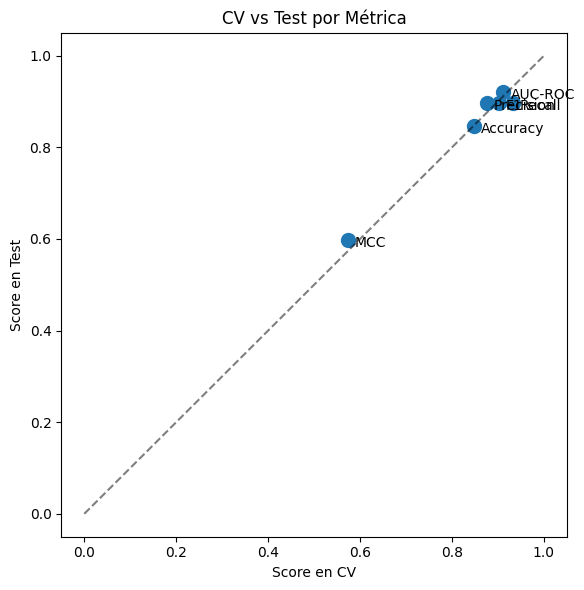

In [42]:
# ===================================================================
# PIPELINE COMPLETO: Optimizar SVM por MCC + RFECV con SVM lineal
# ===================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    train_test_split, StratifiedKFold, GridSearchCV
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef,
    make_scorer
)

# 1) Cargar y preparar datos
data = pd.read_csv('/content/parkinsons.data').drop(columns=['name'])
top8 = [
    'spread2','PPE','spread1','MDVP:APQ',
    'MDVP:Jitter(Abs)','MDVP:PPQ',
    'MDVP:Shimmer(dB)','MDVP:Shimmer'
]
X = data[top8]
y = data['status']

# 2) Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) Pipeline base SVM
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    SVC(probability=True, random_state=42))
])

# 4) GridSearchCV optimizando MCC
param_grid = {
    'clf__kernel': ['linear','rbf'],
    'clf__C':      [0.1, 1, 10, 100],
    'clf__gamma':  ['scale','auto', 0.01, 0.1, 1]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mcc_scorer = make_scorer(matthews_corrcoef)

grid_mcc = GridSearchCV(
    pipe, param_grid,
    cv=cv, scoring=mcc_scorer,
    n_jobs=-1, verbose=1
)
grid_mcc.fit(X_train, y_train)

print("► Mejores hiperparámetros (MCC):", grid_mcc.best_params_)
print(f"► Mejor MCC en CV: {grid_mcc.best_score_:.3f}\n")

# Extraer scaler y SVM RBF afinado
scaler  = grid_mcc.best_estimator_.named_steps['scaler']
svm_mcc = grid_mcc.best_estimator_.named_steps['clf']

# 5) Definir SVM lineal para RFECV (usa C óptimo)
svm_linear = SVC(
    kernel='linear',
    C=grid_mcc.best_params_['clf__C'],
    probability=True,
    random_state=42
)

# 6) Métricas a comparar
metrics = {
    'AUC-ROC':  'roc_auc',
    'Accuracy': 'accuracy',
    'Precision':'precision',
    'Recall':   'recall',
    'F1':       'f1',
    'MCC':      mcc_scorer
}

results = []

for name, scoring in metrics.items():
    # a) Escalar train
    X_tr_s = scaler.transform(X_train)

    # b) RFECV con SVM lineal
    rfecv = RFECV(
        estimator=svm_linear,
        step=1,
        cv=cv,
        scoring=scoring,
        min_features_to_select=1,
        n_jobs=-1
    )
    rfecv.fit(X_tr_s, y_train)

    # c) Recoger features
    support    = rfecv.support_
    n_feat     = rfecv.n_features_
    feat_list  = list(X_train.columns[support])

    # d) Preparar train/test reducidos
    X_tr_red = X_tr_s[:, support]
    X_ts_s   = scaler.transform(X_test)
    X_ts_red = X_ts_s[:, support]

    # e) Entrenar SVM RBF con features reducidas y predecir
    svm_mcc.fit(X_tr_red, y_train)
    y_prob = svm_mcc.predict_proba(X_ts_red)[:,1]
    y_pred = svm_mcc.predict(X_ts_red)

    # f) Calcular scores CV y Test
    cv_score   = rfecv.cv_results_['mean_test_score'].max()
    if name == 'AUC-ROC':
        test_score = roc_auc_score(y_test, y_prob)
    elif name == 'Accuracy':
        test_score = accuracy_score(y_test, y_pred)
    elif name == 'Precision':
        test_score = precision_score(y_test, y_pred)
    elif name == 'Recall':
        test_score = recall_score(y_test, y_pred)
    elif name == 'F1':
        test_score = f1_score(y_test, y_pred)
    else:
        test_score = matthews_corrcoef(y_test, y_pred)

    results.append({
        'Métrica':    name,
        '#Features':  n_feat,
        'CV_Score':   cv_score,
        'Test_Score': test_score,
        'Features':   ", ".join(feat_list)
    })

# 7) DataFrame comparativo
df_comp[['CV_Score','Test_Score']] = df_comp[['CV_Score','Test_Score']].round(3)
display(df_comp[['Métrica','#Features','CV_Score','Test_Score','Features']])

# 8) Gráfico: nº Features óptimas por métrica
plt.figure(figsize=(6,4))
sns.barplot(x='#Features', y='Métrica', data=df_comp, palette='mako')
plt.title('Número óptimo de features según cada métrica')
plt.tight_layout()
plt.show()

# 9) Gráfico: CV vs Test Score
plt.figure(figsize=(6,6))
plt.scatter(df_comp['CV_Score'], df_comp['Test_Score'], s=100)
for _, row in df_comp.iterrows():
    plt.annotate(
        row['Métrica'],
        (row['CV_Score'], row['Test_Score']),
        xytext=(5,-5), textcoords='offset points'
    )
plt.plot([0,1], [0,1], 'k--', alpha=0.5)
plt.xlabel('Score en CV')
plt.ylabel('Score en Test')
plt.title('CV vs Test por Métrica')
plt.tight_layout()
plt.show()


,Model,AUC-ROC,Accuracy,Precision,Recall,F1,MCC
0,Full (8 feat),0.838,0.769,0.955,0.724,0.824,0.550
1,Reduced (2 feat),0.838,0.846,0.897,0.897,0.897,0.597


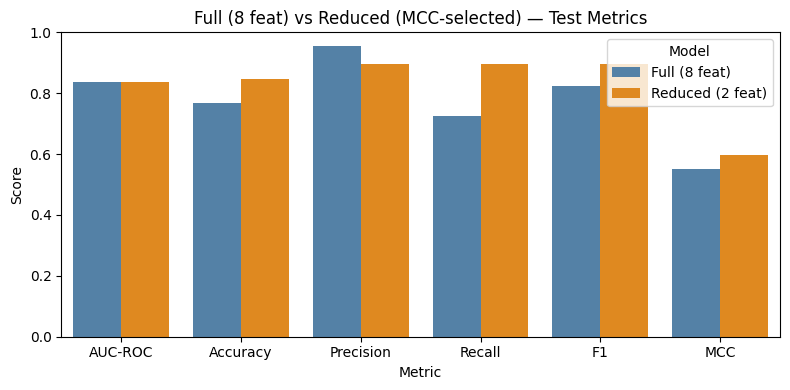

In [40]:
# ===================================================
# BLOQUE DE COMPARATIVA FINAL: Full (8 feat) vs Reduced
# ===================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef
)

# 1) Modelo full con las 8 features
pipe_full = Pipeline([
    ('scaler', scaler),
    ('clf',    svm_mcc)
])
# Nota: 'scaler' y 'svm_mcc' vienen de tu bloque de GridSearchCV por MCC

X_tr_full = scaler.transform(X_train)
X_ts_full = scaler.transform(X_test)

res_full = {}
pipe_full.fit(X_tr_full, y_train)
y_prob_full = pipe_full.predict_proba(X_ts_full)[:,1]
y_pred_full = pipe_full.predict(X_ts_full)

res_full['Model']     = 'Full (8 feat)'
res_full['AUC-ROC']   = roc_auc_score(y_test, y_prob_full)
res_full['Accuracy']  = accuracy_score(y_test, y_pred_full)
res_full['Precision'] = precision_score(y_test, y_pred_full)
res_full['Recall']    = recall_score(y_test, y_pred_full)
res_full['F1']        = f1_score(y_test, y_pred_full)
res_full['MCC']       = matthews_corrcoef(y_test, y_pred_full)

# 2) Modelo reduced con las features seleccionadas por MCC
sel = rfecv.support_                   # rfecv del SVM lineal
X_tr_red = X_tr_full[:, sel]
X_ts_red = X_ts_full[:, sel]

pipe_red = Pipeline([
    ('clf',  svm_mcc)  # ya escala­do antes
])
res_red = {}
pipe_red.fit(X_tr_red, y_train)
y_prob_red = pipe_red.predict_proba(X_ts_red)[:,1]
y_pred_red = pipe_red.predict(X_ts_red)

res_red['Model']     = f"Reduced ({sum(sel)} feat)"
res_red['AUC-ROC']   = roc_auc_score(y_test, y_prob_red)
res_red['Accuracy']  = accuracy_score(y_test, y_pred_red)
res_red['Precision'] = precision_score(y_test, y_pred_red)
res_red['Recall']    = recall_score(y_test, y_pred_red)
res_red['F1']        = f1_score(y_test, y_pred_red)
res_red['MCC']       = matthews_corrcoef(y_test, y_pred_red)

# 3) DataFrame comparativo
# Paso 1: Construir el DataFrame
df_cmp = pd.DataFrame([res_full, res_red])

# Paso 2: Redondear métricas a 3 decimales
for col in ['AUC-ROC','Accuracy','Precision','Recall','F1','MCC']:
    df_cmp[col] = df_cmp[col].round(3)

# Paso 3: Mostrar la tabla
display(df_cmp)

# 4) Gráfico de barras por métrica
df_melt = df_cmp.melt(id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(8,4))
sns.barplot(
    x='Metric', y='Score', hue='Model',
    data=df_melt, palette=['steelblue','darkorange']
)
plt.title('Full (8 feat) vs Reduced (MCC-selected) — Test Metrics')
plt.ylim(0,1)
plt.tight_layout()
plt.show()



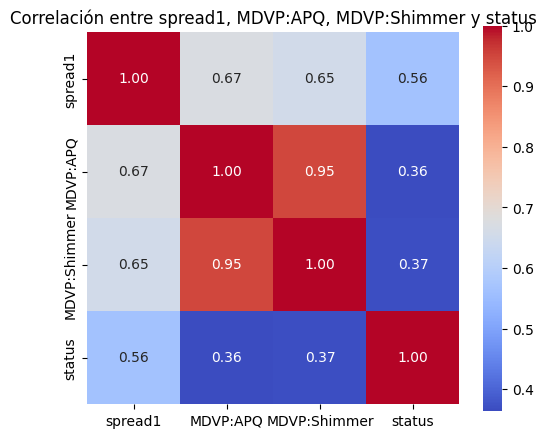

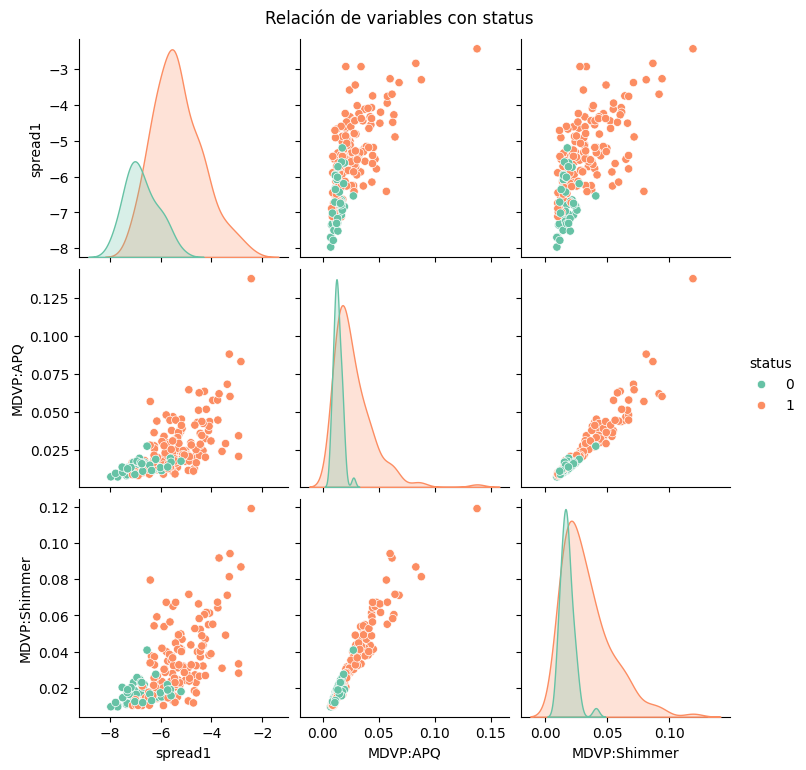

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Heatmap de correlaciones
plt.figure(figsize=(6, 5))
cols = ['spread1', 'MDVP:APQ', 'MDVP:Shimmer', 'status']
corr = data[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlación entre spread1, MDVP:APQ, MDVP:Shimmer y status')
plt.show()

# 2) Pairplot coloreado por status
sns.pairplot(
    data[cols],
    hue='status',
    palette='Set2',
    diag_kind='kde',
    vars=['spread1', 'MDVP:APQ', 'MDVP:Shimmer']
)
plt.suptitle('Relación de variables con status', y=1.02)
plt.show()


/tmp/ipython-input-32-1604706291.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=v, data=df, palette='Set2', cut=0)


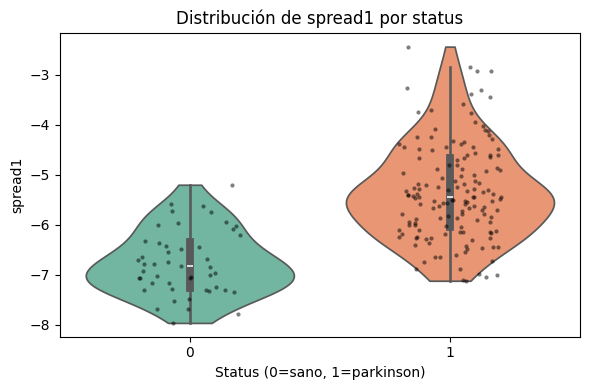

spread1: t-test p=1.769e-21, Mann-Whitney p=1.593e-16



/tmp/ipython-input-32-1604706291.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=v, data=df, palette='Set2', cut=0)


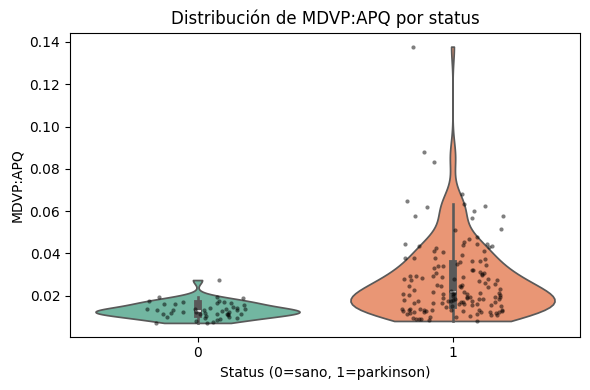

MDVP:APQ: t-test p=3.367e-16, Mann-Whitney p=1.269e-11



/tmp/ipython-input-32-1604706291.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='status', y=v, data=df, palette='Set2', cut=0)


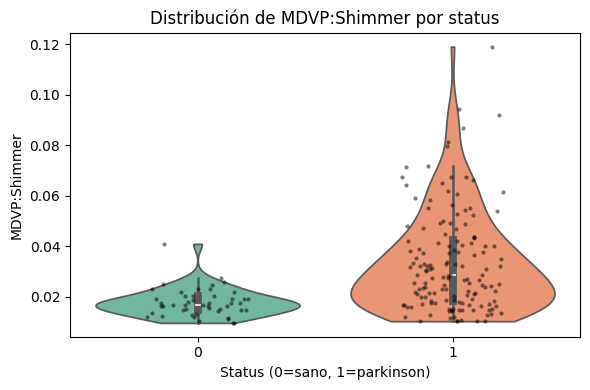

MDVP:Shimmer: t-test p=1.064e-15, Mann-Whitney p=4.225e-09



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef
)

# ——————————————————————————————————————————————
# 0) Preparar datos con las 3 variables finales
# ——————————————————————————————————————————————
data = pd.read_csv('/content/parkinsons.data').drop(columns=['name'])
vars3 = ['spread1','MDVP:APQ','MDVP:Shimmer']
df = data[vars3 + ['status']]

# 1) Análisis univariante/bivariante
# ——————————————————————————————————————————————
for v in vars3:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='status', y=v, data=df, palette='Set2', cut=0)
    sns.stripplot(x='status', y=v, data=df, color='k', size=3, jitter=0.2, alpha=0.5)
    plt.title(f'Distribución de {v} por status')
    plt.xlabel('Status (0=sano, 1=parkinson)')
    plt.ylabel(v)
    plt.tight_layout()
    plt.show()

    # Test de normalidad rápida por grupo (Shapiro si te interesa)
    # Pruebas de diferencia
    grp0 = df[df.status==0][v]
    grp1 = df[df.status==1][v]
    # si normal: t-test, si no: Mann-Whitney
    stat, p_t = ttest_ind(grp0, grp1, equal_var=False)
    stat, p_mw = mannwhitneyu(grp0, grp1, alternative='two-sided')
    print(f"{v}: t-test p={p_t:.3e}, Mann-Whitney p={p_mw:.3e}\n")


In [ ]:
# ——————————————————————————————————————————————
# 2) Modelo explicable: regresión logística + SVM comparativa
# ——————————————————————————————————————————————
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef
)

# 2.1) Estándar y split (nuevamente, para asegurar consistencia)
X = df[vars3]
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 2.2) Regresión logística con escalado
from sklearn.preprocessing import StandardScaler
scaler_lr = StandardScaler().fit(X_train)
X_tr_lr = scaler_lr.transform(X_train)
X_ts_lr = scaler_lr.transform(X_test)

logreg = LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000)
logreg.fit(X_tr_lr, y_train)

# Odds ratios y coeficientes
coef = logreg.coef_.ravel()
odds = np.exp(coef)
print("Variable       Coef     Odds-ratio")
for v, c, o in zip(vars3, coef, odds):
    print(f"{v:14s} {c:+.3f}     {o:.3e}")

# 2.3) SVM con los mejores hiperparámetros de MCC
best = grid_mcc.best_params_
svm = SVC(
    kernel=best['clf__kernel'],
    C=      best['clf__C'],
    gamma=  best['clf__gamma'],
    probability=True,
    random_state=42
)
# nota: no necesitas escalar de nuevo si ya usaste 'scaler' en el pipeline,
# pero aquí vamos a escalar porque SVM es sensible:
scaler_svm = StandardScaler().fit(X_train)
X_tr_svm = scaler_svm.transform(X_train)
X_ts_svm = scaler_svm.transform(X_test)

svm.fit(X_tr_svm, y_train)

# 2.4) Evaluación comparativa en test
for name, (clf, X_ts, X_tr) in [
    ('LogReg', (logreg, X_ts_lr, X_tr_lr)),
    ('SVM',    (svm,    X_ts_svm, X_tr_svm))
]:
    y_prob = clf.predict_proba(X_ts)[:,1]
    y_pred = clf.predict(X_ts)
    print(f"\n{name} metrics:")
    print(f" AUC-ROC : {roc_auc_score(y_test, y_prob):.3f}")
    print(f" Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f" Precision: {precision_score(y_test, y_pred):.3f}")
    print(f" Recall  : {recall_score(y_test, y_pred):.3f}")
    print(f" F1      : {f1_score(y_test, y_pred):.3f}")
    print(f" MCC     : {matthews_corrcoef(y_test, y_pred):.3f}")




Variable       Coef     Odds-ratio
spread1        +1.848     6.345e+00
MDVP:APQ       +7.345     1.549e+03
MDVP:Shimmer   -4.378     1.256e-02

LogReg metrics:
 AUC-ROC : 0.883
 Accuracy: 0.872
 Precision: 0.900
 Recall  : 0.931
 F1      : 0.915
 MCC     : 0.654

SVM metrics:
 AUC-ROC : 0.921
 Accuracy: 0.949
 Precision: 0.935
 Recall  : 1.000
 F1      : 0.967
 MCC     : 0.865


,Train,Test
AUC-ROC,0.951,0.921
Accuracy,0.885,0.949
Precision,0.879,0.935
Recall,0.983,1.000
F1,0.928,0.967
MCC,0.669,0.865


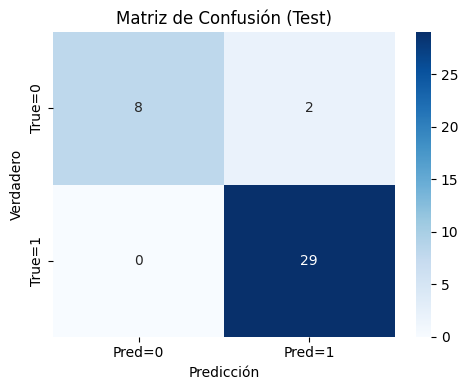

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef, confusion_matrix
)
import joblib

# 1) Cargar datos y quedarse con las 3 variables
data = pd.read_csv('/content/parkinsons.data').drop(columns=['name'])
features_final = ['spread1', 'MDVP:APQ', 'MDVP:Shimmer']
X = data[features_final]
y = data['status']

# 2) Dividir train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) Escalado
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

# 4) Definir y entrenar SVM con los mejores hiperparámetros (MCC)
best_params = {'kernel':'rbf', 'C':100, 'gamma':1}
svm_final = SVC(**best_params, probability=True, random_state=42)
svm_final.fit(X_train_s, y_train)

# 5) Guardar pipeline completo (scaler + modelo)
pipeline_final = {'scaler': scaler, 'model': svm_final}
joblib.dump(pipeline_final, 'svm_mcc_final.joblib')

# 6) Métricas en Train
y_train_prob = svm_final.predict_proba(X_train_s)[:,1]
y_train_pred = svm_final.predict(X_train_s)
metrics_train = {
    'AUC-ROC': roc_auc_score(y_train, y_train_prob),
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'Precision': precision_score(y_train, y_train_pred),
    'Recall': recall_score(y_train, y_train_pred),
    'F1': f1_score(y_train, y_train_pred),
    'MCC': matthews_corrcoef(y_train, y_train_pred)
}

# 7) Métricas en Test
y_test_prob = svm_final.predict_proba(X_test_s)[:,1]
y_test_pred = svm_final.predict(X_test_s)
metrics_test = {
    'AUC-ROC': roc_auc_score(y_test, y_test_prob),
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1': f1_score(y_test, y_test_pred),
    'MCC': matthews_corrcoef(y_test, y_test_pred)
}

# 8) Matriz de confusión en Test
cm = confusion_matrix(y_test, y_test_pred)

# 9) Mostrar resultados
df_metrics = pd.DataFrame({
    'Train': metrics_train,
    'Test':  metrics_test
}).round(3)

display(df_metrics)
# Opción B: Con seaborn heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred=0','Pred=1'],
            yticklabels=['True=0','True=1'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión (Test)')
plt.tight_layout()
plt.show()

# *HASTA AQUIIIIIIIIII *